# Data Cleaning

## Indicies of Deprivation 2015 Files

### File Refactoring:
I removed all empty spaces between the column headings in the "File_2_ID2015_Domains_of_deprivation.xlsx" file to make it easier to work with and renamed the file to "ID2015_Domains_of_deprivation.xlsa".

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Load file "Domains of Deprivation 2015" into dataframe

data = './data/Deprivation_Index/ID2015_Domains_of_deprivation.xlsx'
df = pd.read_excel(data, sheet_name='ID2015 Domains')

In [3]:
df.head(3)

,LSOA_code_2011,LSOA_name_2011,Local_Authority_District_code_2013,Local_Authority_District_name_2013,Index_of_Multiple_Deprivation_IMD_Rank,Index_of_Multiple_Deprivation_IMD_Decile,Income_Rank,Income_Decile,Employment_Rank,Employment_Decile,Education_Skills_and_Training_Rank,Education_Skills_and_Training_Decile,Health_Deprivation_and_Disability_Rank,Health_Deprivation_and_Disability_Decile,Crime_Rank,Crime_Decile,Barriers_to_Housing_and_Services_Rank,Barriers_to_Housing_and_Services_Decile,Living_Environment_Rank,Living_Environment_Decile
0,E01031349,Adur 001A,E07000223,Adur,21352,7,18992,6,19305,6,13727,5,25876,8,12817,4,28166,9,18367,6
1,E01031350,Adur 001B,E07000223,Adur,8864,3,9233,3,7879,3,6969,3,6883,3,12781,4,11399,4,16242,5
2,E01031351,Adur 001C,E07000223,Adur,22143,7,24539,8,23389,8,10213,4,24693,8,9112,3,24743,8,22299,7


In [4]:
list(df.columns)

['LSOA_code_2011',
 'LSOA_name_2011',
 'Local_Authority_District_code_2013',
 'Local_Authority_District_name_2013',
 'Index_of_Multiple_Deprivation_IMD_Rank',
 'Index_of_Multiple_Deprivation_IMD_Decile',
 'Income_Rank',
 'Income_Decile',
 'Employment_Rank',
 'Employment_Decile',
 'Education_Skills_and_Training_Rank',
 'Education_Skills_and_Training_Decile',
 'Health_Deprivation_and_Disability_Rank',
 'Health_Deprivation_and_Disability_Decile',
 'Crime_Rank',
 'Crime_Decile',
 'Barriers_to_Housing_and_Services_Rank',
 'Barriers_to_Housing_and_Services_Decile',
 'Living_Environment_Rank',
 'Living_Environment_Decile']

In [5]:
# Tell me more about the dataset
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32844 entries, 0 to 32843
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   LSOA_code_2011                            32844 non-null  object
 1   LSOA_name_2011                            32844 non-null  object
 2   Local_Authority_District_code_2013        32844 non-null  object
 3   Local_Authority_District_name_2013        32844 non-null  object
 4   Index_of_Multiple_Deprivation_IMD_Rank    32844 non-null  int64 
 5   Index_of_Multiple_Deprivation_IMD_Decile  32844 non-null  int64 
 6   Income_Rank                               32844 non-null  int64 
 7   Income_Decile                             32844 non-null  int64 
 8   Employment_Rank                           32844 non-null  int64 
 9   Employment_Decile                         32844 non-null  int64 
 10  Education_Skills_and_Training_Rank        3284

In [6]:
# Descibe the dataset please
#pd.options.display.float_format = '{:,.2f}'.format # Only want to see 2 decimal places
df.describe()

,Index_of_Multiple_Deprivation_IMD_Rank,Index_of_Multiple_Deprivation_IMD_Decile,Income_Rank,Income_Decile,Employment_Rank,Employment_Decile,Education_Skills_and_Training_Rank,Education_Skills_and_Training_Decile,Health_Deprivation_and_Disability_Rank,Health_Deprivation_and_Disability_Decile,Crime_Rank,Crime_Decile,Barriers_to_Housing_and_Services_Rank,Barriers_to_Housing_and_Services_Decile,Living_Environment_Rank,Living_Environment_Decile
count,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000
mean,16422.499391,5.500122,16422.498660,5.500122,16422.498873,5.500122,16422.499330,5.500122,16422.499726,5.500122,16422.499635,5.500122,16422.499208,5.500122,16422.499574,5.500122
std,9481.390618,2.872325,9481.390331,2.872325,9481.390246,2.872325,9481.390748,2.872325,9481.390467,2.872325,9481.390606,2.872325,9481.390574,2.872325,9481.390570,2.872325
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8211.750000,3.000000,8211.750000,3.000000,8211.750000,3.000000,8211.750000,3.000000,8211.750000,3.000000,8211.750000,3.000000,8211.750000,3.000000,8211.750000,3.000000
50%,16422.500000,5.500000,16422.500000,5.500000,16422.500000,5.500000,16422.500000,5.500000,16422.500000,5.500000,16422.500000,5.500000,16422.500000,5.500000,16422.500000,5.500000
75%,24633.250000,8.000000,24633.250000,8.000000,24633.250000,8.000000,24633.250000,8.000000,24633.250000,8.000000,24633.250000,8.000000,24633.250000,8.000000,24633.250000,8.000000
max,32844.000000,10.000000,32844.000000,10.000000,32844.000000,10.000000,32844.000000,10.000000,32844.000000,10.000000,32844.000000,10.000000,32844.000000,10.000000,32844.000000,10.000000


In [7]:
# Who has the worst income in England?
df[df['Income_Rank'] == 1]

,LSOA_code_2011,LSOA_name_2011,Local_Authority_District_code_2013,Local_Authority_District_name_2013,Index_of_Multiple_Deprivation_IMD_Rank,Index_of_Multiple_Deprivation_IMD_Decile,Income_Rank,Income_Decile,Employment_Rank,Employment_Decile,Education_Skills_and_Training_Rank,Education_Skills_and_Training_Decile,Health_Deprivation_and_Disability_Rank,Health_Deprivation_and_Disability_Decile,Crime_Rank,Crime_Decile,Barriers_to_Housing_and_Services_Rank,Barriers_to_Housing_and_Services_Decile,Living_Environment_Rank,Living_Environment_Decile
2598,E01012673,Blackpool 010A,E06000009,Blackpool,2,1,1,1,10,1,47,1,12,1,10,1,24093,8,766,1


Poor Blackpool. Dataset seems to be working fine. We'll probably come back to this later.

## Census data


### File Refactoring
File 85043238.csv : The file meta data was removed. The file name was changed to "NS_SeC_16_to_24.csv"

File 87985007.csv : The file meta data was removed. The file name was changed to "NS_SeC_25_to_49.csv"

File 91695374.csv : The file meta data was removed. The file name was changed to "NS_SeC_50_to_64.csv"

File 93917134.csv : The file meta data was removed. The file name was changed to "NS_SeC_65_to_over.csv"

In all four files the heading "2011 super output area - middle layer" was changed to MSOA_2011 and the heading "mnemonic" was changed to MSOA_code_2011. All empty spaces and dashes in the heading row waere replaced with underscores. Finally The empty row after the heading row was removed.

In [8]:
# Lets test to see if all our df are working fine.
df1 = pd.read_csv("./data/census/NS_SeC_16_to_24.csv")
df1.head(3)

,MSOA_2011,MSOA_code_2011,1.1_Large_employers_and_higher_managerial_and_administrative_occupations,1.2_Higher_professional_occupations,"2._Lower_managerial,_administrative_and_professional_occupations",3._Intermediate_occupations,4._Small_employers_and_own_account_workers,5._Lower_supervisory_and_technical_occupations,6._Semi_routine_occupations,7._Routine_occupations,L14.1_Never_worked,L14.2_Long_term_unemployed,L15_Full_time_students,L17_Not_classifiable_for_other_reasons
0,Darlington 001,E02002559,2,14,77,89,11,39,92,66,23,3,321,0
1,Darlington 002,E02002560,3,9,35,80,9,43,97,60,25,7,242,0
2,Darlington 003,E02002561,2,7,55,70,5,37,77,39,26,5,217,0


In [9]:
df2 = pd.read_csv("./data/census/NS_SeC_25_to_49.csv")
df2.head(3)

,MSOA_2011,MSOA_code_2011,1.1_Large_employers_and_higher_managerial_and_administrative_occupations,1.2_Higher_professional_occupations,"2._Lower_managerial,_administrative_and_professional_occupations",3._Intermediate_occupations,4._Small_employers_and_own_account_workers,5._Lower_supervisory_and_technical_occupations,6._Semi_routine_occupations,7._Routine_occupations,L14.1_Never_worked,L14.2_Long_term_unemployed,L15_Full_time_students,L17_Not_classifiable_for_other_reasons
0,Darlington 001,E02002559,145,408,1112,492,308,217,285,167,34,40,32,0
1,Darlington 002,E02002560,52,142,531,407,176,185,310,220,38,45,27,0
2,Darlington 003,E02002561,37,143,481,335,121,134,272,200,35,33,19,0


In [10]:
df3 = pd.read_csv("./data/census/NS_SeC_50_to_64.csv")
df3.head(3)

,MSOA_2011,MSOA_code_2011,1.1_Large_employers_and_higher_managerial_and_administrative_occupations,1.2_Higher_professional_occupations,"2._Lower_managerial,_administrative_and_professional_occupations",3._Intermediate_occupations,4._Small_employers_and_own_account_workers,5._Lower_supervisory_and_technical_occupations,6._Semi_routine_occupations,7._Routine_occupations,L14.1_Never_worked,L14.2_Long_term_unemployed,L15_Full_time_students,L17_Not_classifiable_for_other_reasons
0,Darlington 001,E02002559,75,179,503,240,281,99,180,134,14,18,3,0
1,Darlington 002,E02002560,28,42,212,179,124,95,244,189,11,16,5,0
2,Darlington 003,E02002561,55,81,327,266,116,122,264,186,8,23,3,0


In [11]:
df4 = pd.read_csv("./data/census/NS_SeC_65_to_over.csv")
df4.head(3)

,MSOA_2011,MSOA_code_2011,1.1_Large_employers_and_higher_managerial_and_administrative_occupations,1.2_Higher_professional_occupations,"2._Lower_managerial,_administrative_and_professional_occupations",3._Intermediate_occupations,4._Small_employers_and_own_account_workers,5._Lower_supervisory_and_technical_occupations,6._Semi_routine_occupations,7._Routine_occupations,L14.1_Never_worked,L14.2_Long_term_unemployed,L15_Full_time_students,L17_Not_classifiable_for_other_reasons
0,Darlington 001,E02002559,40.0,100.0,295.0,201.0,228.0,104.0,178.0,127.0,37.0,5.0,1.0,0.0
1,Darlington 002,E02002560,13.0,20.0,120.0,138.0,68.0,127.0,220.0,199.0,32.0,0.0,1.0,0.0
2,Darlington 003,E02002561,22.0,37.0,168.0,162.0,70.0,112.0,205.0,169.0,41.0,0.0,2.0,0.0


Lets look at the MSOAs with the highest number of students in the 16 to 24 age range.

In [12]:
students_16_24 = df1[["MSOA_2011", "L15_Full_time_students"]]
students_16_24_sorted = students_16_24.sort_values(["L15_Full_time_students"], ascending=False)

Now lets see the highest number of Higheer Professional occupation between the 25 to 49 age range

In [13]:
higher_professional_25_49 = df2[["MSOA_2011", "1.2_Higher_professional_occupations"]]
higher_professional_25_49_sorted = higher_professional_25_49.sort_values(["1.2_Higher_professional_occupations"], ascending=False)

Text(0, 0.5, 'No of Full Time Students between 16 and 24')

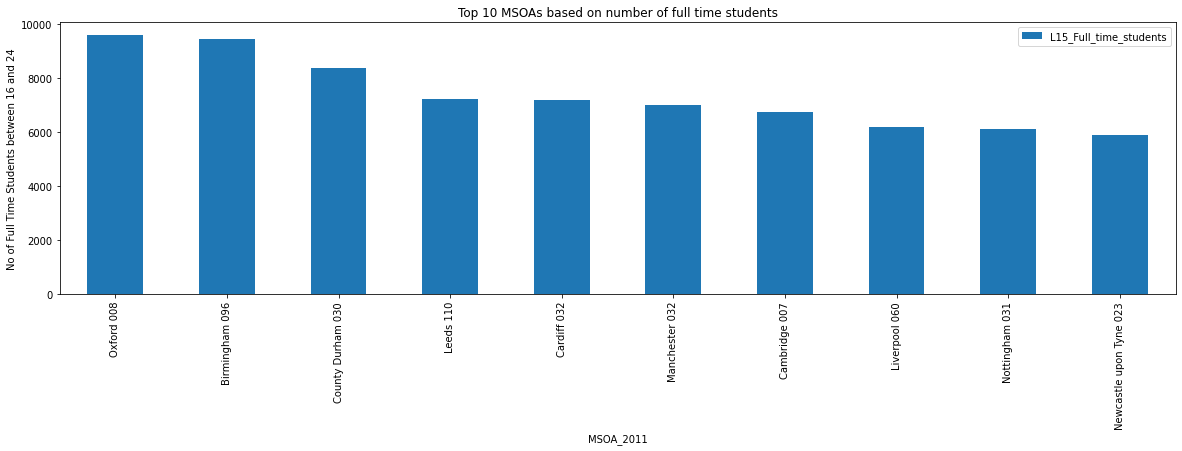

In [14]:
top10_students = students_16_24_sorted.head(10)
ax = top10_students.plot(x="MSOA_2011", y="L15_Full_time_students", kind="bar", figsize=(20, 5))
ax.set_title("Top 10 MSOAs based on number of full time students")
ax.set_ylabel("No of Full Time Students between 16 and 24")

Text(0, 0.5, 'No of higher professional occupations between 25 and 49')

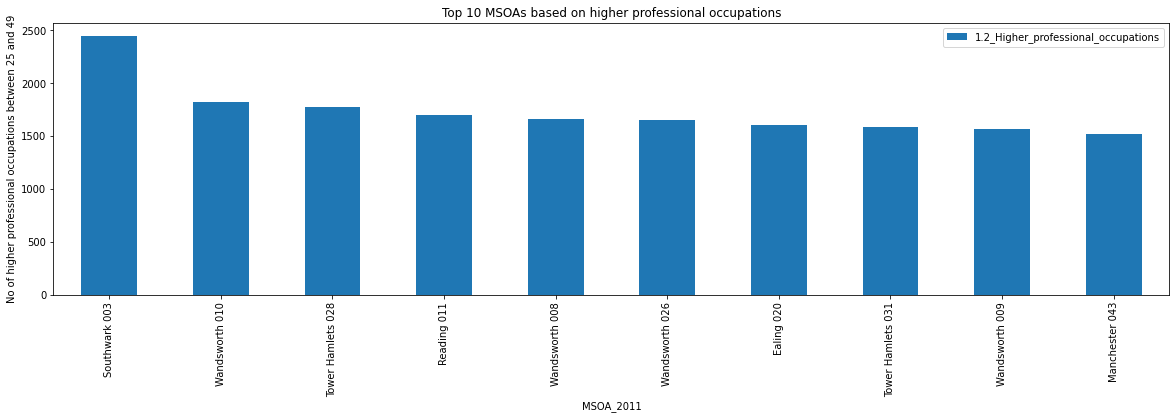

In [15]:
top10_professional = higher_professional_25_49_sorted.head(10)
ax = top10_professional.plot(x="MSOA_2011", y="1.2_Higher_professional_occupations", kind="bar", figsize=(20, 5))
ax.set_title("Top 10 MSOAs based on higher professional occupations")
ax.set_ylabel("No of higher professional occupations between 25 and 49")

No clear connection there really. Only point of interest is that Wansworth appears several times in the second graph. Something to remember. Might be worth further examination.

Lets look at the MSOA in Blackpool with the highest number of full time students and compare it with the Oxford.

In [16]:
blackpool = df1.loc[df1.MSOA_2011.str.contains("Blackpool")]
blackpool.sort_values(["L15_Full_time_students"], ascending=False).head(3)

,MSOA_2011,MSOA_code_2011,1.1_Large_employers_and_higher_managerial_and_administrative_occupations,1.2_Higher_professional_occupations,"2._Lower_managerial,_administrative_and_professional_occupations",3._Intermediate_occupations,4._Small_employers_and_own_account_workers,5._Lower_supervisory_and_technical_occupations,6._Semi_routine_occupations,7._Routine_occupations,L14.1_Never_worked,L14.2_Long_term_unemployed,L15_Full_time_students,L17_Not_classifiable_for_other_reasons
366,Blackpool 009,E02002641,1,16,68,89,19,45,164,88,63,20,388,0
367,Blackpool 010,E02002642,2,5,47,46,19,36,175,156,134,41,367,0
372,Blackpool 015,E02002647,1,13,48,84,26,59,188,109,84,14,362,0


In [17]:
oxford = df1.loc[df1.MSOA_2011.str.contains("Oxford")]
oxford.sort_values(["L15_Full_time_students"], ascending=False).head(3)

,MSOA_2011,MSOA_code_2011,1.1_Large_employers_and_higher_managerial_and_administrative_occupations,1.2_Higher_professional_occupations,"2._Lower_managerial,_administrative_and_professional_occupations",3._Intermediate_occupations,4._Small_employers_and_own_account_workers,5._Lower_supervisory_and_technical_occupations,6._Semi_routine_occupations,7._Routine_occupations,L14.1_Never_worked,L14.2_Long_term_unemployed,L15_Full_time_students,L17_Not_classifiable_for_other_reasons
5780,Oxford 008,E02005947,0,30,58,42,10,16,46,48,36,9,9581,0
5783,Oxford 011,E02005950,12,74,193,106,23,41,108,80,68,5,3860,0
5778,Oxford 006,E02005945,0,61,116,60,10,38,76,54,36,5,2221,0


Oxford 008 has almost 24 times the amount of full time students than Blackpool 009. That gap did surpirse me.
There is something fishy here. Lets look at the total number of MSOAs for each.

In [18]:
len(blackpool)

19

In [19]:
len(oxford)

53

That explains things. None of this is therefore very useful.

### Proportions instead of numbers
It occured to me that "number of" is not necessarily very representative, as some areas are much larger than others in population. I will need to look at proportions instead. 

Lets look at the proportions of full time students in the 16-24 age range and proportion of higher professional occupations in the 25-49 range 

Let first add an extra column to both df1 (16-24) and df2 (25-49) dataframes named Total that holds the total number of persons in each MSOA

In [20]:
df1["Total"] = df1.iloc[:, 2:13].sum(axis=1)
df2["Total"] = df2.iloc[:, 2:13].sum(axis=1)

Next lets calculate the proportions of full time students in each MSOA

In [21]:
# Full time students ages 16 to 24
df1_students = df1[["MSOA_2011", "L15_Full_time_students", "Total"]]
df1_students.head()

,MSOA_2011,L15_Full_time_students,Total
0,Darlington 001,321,737
1,Darlington 002,242,610
2,Darlington 003,217,540
3,Darlington 004,240,737
4,Darlington 005,186,554


In [22]:
df1_students["Proportion_of_fulltime_students_16_24"] = round((df1_students["L15_Full_time_students"]/df1_students["Total"]) * 100)
df1_students.head(3)

<ipython-input-22-b2c90d7d2c84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_students["Proportion_of_fulltime_students_16_24"] = round((df1_students["L15_Full_time_students"]/df1_students["Total"]) * 100)


,MSOA_2011,L15_Full_time_students,Total,Proportion_of_fulltime_students_16_24
0,Darlington 001,321,737,44.0
1,Darlington 002,242,610,40.0
2,Darlington 003,217,540,40.0


Now that we have the proportion of full time students between 16 and 24, lets look at the proportion of higher professional occupations in the same MSOAs between 25 and 49.

In [23]:
# Higher Professional Occupations aged 25 to 49
df2_occupation = df2[["MSOA_2011", "1.2_Higher_professional_occupations", "Total"]]
df2_occupation.head()

,MSOA_2011,1.2_Higher_professional_occupations,Total
0,Darlington 001,408,3240
1,Darlington 002,142,2133
2,Darlington 003,143,1810
3,Darlington 004,83,2160
4,Darlington 005,89,1534


In [24]:
df2_occupation["Proportion_of_higher_occupation_25_49"] = round((df2_occupation["1.2_Higher_professional_occupations"]/df2_occupation["Total"]) * 100)
df2_occupation.head(3)

<ipython-input-24-dea01c36c79d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_occupation["Proportion_of_higher_occupation_25_49"] = round((df2_occupation["1.2_Higher_professional_occupations"]/df2_occupation["Total"]) * 100)


,MSOA_2011,1.2_Higher_professional_occupations,Total,Proportion_of_higher_occupation_25_49
0,Darlington 001,408,3240,13.0
1,Darlington 002,142,2133,7.0
2,Darlington 003,143,1810,8.0


In [25]:
# Let create a new Dataframe for the proportions
new_data = {
    "MSOA": df1_students["MSOA_2011"],
    "higher_occupation_25_49": df2_occupation["Proportion_of_higher_occupation_25_49"],
    "fulltime_students_16_24": df1_students["Proportion_of_fulltime_students_16_24"]
}
proportions_df = pd.DataFrame(new_data)
proportions_df

,MSOA,higher_occupation_25_49,fulltime_students_16_24
0,Darlington 001,13.0,44.0
1,Darlington 002,7.0,40.0
2,Darlington 003,8.0,40.0
3,Darlington 004,4.0,33.0
4,Darlington 005,6.0,34.0
...,...,...,...
7196,Newport 016,13.0,47.0
7197,Newport 017,6.0,44.0
7198,Newport 018,4.0,60.0
7199,Newport 019,6.0,35.0


What would a scatter plot of the entire proportion_df look like I wonder?

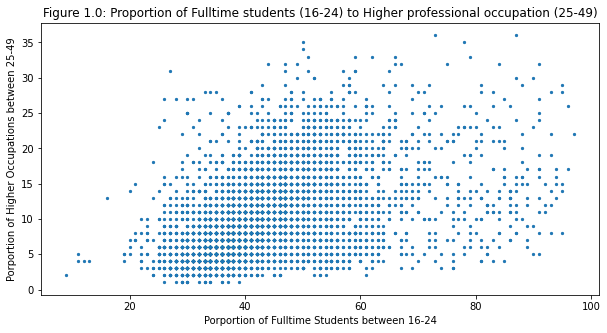

In [26]:
# Figure 1.0
px = proportions_df.plot.scatter(x="fulltime_students_16_24", y = "higher_occupation_25_49", s = 5, figsize=(10, 5), xlabel="Porportion of Fulltime Students between 16-24", ylabel="Porportion of Higher Occupations between 25-49", title="Figure 1.0: Proportion of Fulltime students (16-24) to Higher professional occupation (25-49)")

In [27]:
# Lets bring in a package that can do regressions easily
import seaborn as sns

/home/hamed/.pyenv/versions/emsx_3.8.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fulltime_students_16_24', ylabel='higher_occupation_25_49'>

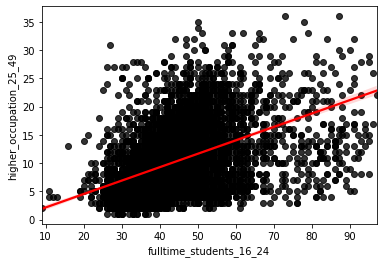

In [28]:
sns.regplot(proportions_df["fulltime_students_16_24"], proportions_df["higher_occupation_25_49"], scatter_kws={"color": "black"}, line_kws={"color": "red"})


Looking at the regression line above we can see that there is a postive relationship between fulltime students aged 16-24 and higher professional occupations aged 25-49

In [49]:
# Let save this df as an csv so we can use it later again in another notebook.
if not os.path.exists("./data/census/mydata"):
    os.makedirs("./data/census/mydata")
proportions_df.to_csv(r"./data/census/mydata/census_proportions_16_49.csv", index=False, header=True)

## Creating Categories

Using the scatter plot in figure 1.0 I am going to create four categories from the four quadrants of the proportional_df dataset. The x axes ranges from 0 to 100 and will be divided on the 50th line. The y axes ranges from 0 to 35 and will be divided on the 17th line (rounded down).

With these divisions we get 4 quadrants.

* Quadrant I : *High Conversion (HC)* - This will be the _top left_ quadrant of the scatter plot
* Quadrant II : *High Proportional (HP)* - This will be the _top right_ quadrant of the scatter plot
* Quadrant III : *Low Conversion (LC)* - This will be the _bottom right_ quadrant of the scatter plot
* Quadrant IV : *Low Proportional (LP)* - This will be the _bottom left_ quadrant of the scatter plot


Next we need to seprate our proportion_df data into their respective groups.

* QI will consist of the Higher_Occupation dataframe proportion ranges from 17 to 35, and the Fulltime_student dataframe proportion ranges from 0 to 49.
* QII will consist of the Higher_Occupation dataframe proportion ranges from 17 to 35, and the Fulltime_student dataframe proportion ranges from 50 to 100.
* QIII will consist of the Higher_Occupation dataframe proportion ranges from 0 to 16, and the Fulltime_student dataframe proportion ranges from 50 to 100.
* QIV will consist of the Higher_Occupation dataframe proportion ranges from 0 to 16, and the Fulltime_student dataframe proportion ranges from 0 to 49.

In [29]:
# Creating Categories Q1 to Q4

def createCategories(aDF):
    categories = {
        "QI": {},
        "QII": {},
        "QIII": {},
        "QIV": {}
    }
    QI_raw = {
        "MSOA": [],
        "quadrant": "Q1",
        "higher_occupation_25_49": [],
        "fulltime_students_16_24": [],
    }
    QII_raw = {
        "MSOA": [],
        "quadrant": "Q2",
        "higher_occupation_25_49": [],
        "fulltime_students_16_24": [],
    }
    QIII_raw = {
        "MSOA": [],
        "quadrant": "Q3",
        "higher_occupation_25_49": [],
        "fulltime_students_16_24": [],
    }
    QIV_raw = {
        "MSOA": [],
        "quadrant": "Q4",
        "higher_occupation_25_49": [],
        "fulltime_students_16_24": [],
    }
    for i, row in aDF.iterrows():
        MSOA = row[0]
        HO = row[1]
        FTS = row[2]
        if (HO > 16 and FTS < 50): # for Q1
            QI_raw["MSOA"].append(MSOA)
            QI_raw["higher_occupation_25_49"].append(HO),
            QI_raw["fulltime_students_16_24"].append(FTS)
        if (HO > 16 and FTS > 49): # for Q2
            QII_raw["MSOA"].append(MSOA)
            QII_raw["higher_occupation_25_49"].append(HO),
            QII_raw["fulltime_students_16_24"].append(FTS)
        if (HO < 17 and FTS > 49): # for Q3
            QIII_raw["MSOA"].append(MSOA)
            QIII_raw["higher_occupation_25_49"].append(HO),
            QIII_raw["fulltime_students_16_24"].append(FTS)
        if (HO < 17 and FTS < 50): # for Q4
            QIV_raw["MSOA"].append(MSOA)
            QIV_raw["higher_occupation_25_49"].append(HO),
            QIV_raw["fulltime_students_16_24"].append(FTS)
  

    categories["QI"] = QI_raw
    categories["QII"] = QII_raw
    categories["QIII"] = QIII_raw
    categories["QIV"] = QIV_raw
    return categories
    

categories = createCategories(proportions_df)
QI = pd.DataFrame(categories["QI"])
QII = pd.DataFrame(categories["QII"])
QIII = pd.DataFrame(categories["QIII"])
QIV = pd.DataFrame(categories["QIV"])

In [30]:
# Looks about right
QI.head(3)

,MSOA,quadrant,higher_occupation_25_49,fulltime_students_16_24
0,Darlington 010,Q1,19.0,49.0
1,Northumberland 034,Q1,18.0,45.0
2,Northumberland 036,Q1,20.0,49.0


In [53]:
# One Q to rule them all!
# Lets combine all the quadrant data and save it as an csv to use in another notebook later.
quadrants_df = pd.concat([QI, QII, QIII, QIV], axis=0)
if not os.path.exists("./data/census/mydata"):
    os.makedirs("./data/census/mydata")
quadrants_df.to_csv(r"./data/census/mydata/census_quadrants_df.csv", index=False, header=True)

### Creating Training Data for KNN

Before I can input the training data into the KNN I first need to create two more datasets. a) the training data itself which will consist of 80% of the entire dataset and b) the test data which will consist of 20% of the entire dataset.

#### Creating the Training and test data sets

In order to create the training data I will randomly remove 20% of the rows in each QI to QIV datasets and rename each to QI_train to QIV_train. The removed 20% will be saved in their own test dataframes 

In [31]:
np.random.seed(10) # not true randomness but close enough - true randomsness is also a myth I am told

In [32]:
# Q1 total(411) tests(82) train(329) - I am rounding down fyi
remove_number = int(len(QI) * 0.2) # remove 20%
# QI train data 80% of QI dataset
QI_test_indices = np.random.choice(QI.index, remove_number, replace=False)
QI_train = QI.drop(QI_test_indices)
# QI test data 20% of QI dataset
QI_train_indices = [x for x in QI.index if x not in QI_test_indices]
QI_test = QI.drop(QI_train_indices)

In [33]:
# Q2 total(545) test(109) train(436)
remove_number = int(len(QII) * 0.2) # remove 20%
# QII train data 80% of QII dataset
QII_test_indices = np.random.choice(QII.index, remove_number, replace=False)
QII_train = QII.drop(QII_test_indices)
# QII test data 20% of QI dataset
QII_train_indices = [x for x in QII.index if x not in QII_test_indices]
QII_test = QII.drop(QII_train_indices)

In [34]:
# Q3 total(974) test(194) train(780)
remove_number = int(len(QIII) * 0.2) # remove 20%
# QIII train data 80% of QIII dataset
QIII_test_indices = np.random.choice(QIII.index, remove_number, replace=False)
QIII_train = QIII.drop(QIII_test_indices)
# QIII test data 20% of QI dataset
QIII_train_indices = [x for x in QIII.index if x not in QIII_test_indices]
QIII_test = QIII.drop(QIII_train_indices)

In [35]:
# Q4 total(5271) test(1054) train(4217) - rounding down
remove_number = int(len(QIV) * 0.2) # remove 20%
# QIV train data 80% of QIV dataset
QIV_test_indices = np.random.choice(QIV.index, remove_number, replace=False)
QIV_train = QIV.drop(QIV_test_indices)
# QIV test data 20% of QIV dataset
QIV_train_indices = [x for x in QIV.index if x not in QIV_test_indices]
QIV_test = QIV.drop(QIV_train_indices)

### The $k$-nearest neighbours classifier

In [36]:
# combine all the training data into one
Q_training_combined_df = pd.concat([QI_train, QII_train, QIII_train, QIV_train], axis=0)
Q_training_df = Q_training_combined_df[["higher_occupation_25_49", "fulltime_students_16_24"]]
targetValues = Q_training_combined_df["quadrant"]

In [37]:
# import KNN classifier
from sklearn.neighbors import KNeighborsClassifier
# set K to be 3
classifier_3NN = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

In [38]:
classifier_3NN.fit(Q_training_df, targetValues)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

### The 3-NN classifier is now ready

Let see how well it classifies our random Q1 test data

In [39]:
QI_test_v2 = QI_test[["higher_occupation_25_49", "fulltime_students_16_24"]]
classifier_3NN.predict(QI_test_v2)

array(['Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1',
       'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1',
       'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1',
       'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1',
       'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1',
       'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q4', 'Q1',
       'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1',
       'Q1', 'Q1', 'Q1', 'Q1', 'Q1'], dtype=object)

All Q1 instances with the exception of one are in the correct predicted quadrant. This is a good sign.
Lets look at the rest of the three test data sets.

In [40]:
QII_test_v2 = QII_test[["higher_occupation_25_49", "fulltime_students_16_24"]]
classifier_3NN.predict(QII_test_v2)

array(['Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2',
       'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2',
       'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2',
       'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2',
       'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2',
       'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2',
       'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2',
       'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2',
       'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2',
       'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2'],
      dtype=object)

In [41]:
QIII_test_v2 = QIII_test[["higher_occupation_25_49", "fulltime_students_16_24"]]
classifier_3NN.predict(QIII_test_v2)

array(['Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3',
       'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3',
       'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3',
       'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3',
       'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3',
       'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3',
       'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3',
       'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3',
       'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3',
       'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3',
       'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3',
       'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3',
       'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3',
       'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q

In [42]:
QIV_test_v2 = QIV_test[["higher_occupation_25_49", "fulltime_students_16_24"]]
Q4_prediction_list = classifier_3NN.predict(QIV_test_v2)
Q4_prediction_list


array(['Q4', 'Q4', 'Q4', ..., 'Q4', 'Q4', 'Q4'], dtype=object)

In [43]:
result = [x for x in Q4_prediction_list.tolist() if x != "Q4"]
len(result)

0

The classifier seems to result in pretty good perdictions